# Iris Dataset

The code below learns to classify irises using the input data.
- Data is imported
- Basic exploration is done
- The data is visualized
- And then split into training and validation sets
- Multiple models are trained on the data
- The best model is selected and used to predict categories for new irises

In [2]:
# Import libraries
%matplotlib inline
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [4]:
# Explore the data
print 'Shape: %s' % (dataset.shape,)
print

print 'Head'
print '- - - - - - - - - - - - - - - - - - - - '
print dataset.head(20)
print

print 'Description'
print '- - - - - - - - - - - - - - - - - - - - '
print dataset.describe()
print

print 'Size of Classes'
print '- - - - - - - - - - - - - - - - - - - - '
print dataset.groupby('class').size()
print

Shape: (150, 5)

Head
- - - - - - - - - - - - - - - - - - - - 
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3

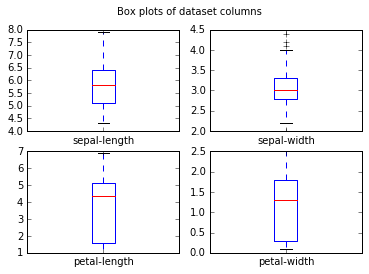

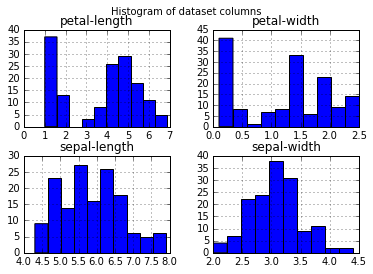

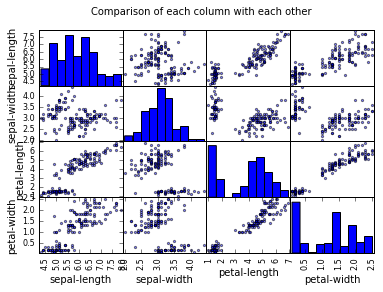

In [5]:
# Visualize data
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.suptitle('Box plots of dataset columns')
plt.show()

dataset.hist()
plt.suptitle('Histogram of dataset columns')
plt.show()

scatter_matrix(dataset)
plt.suptitle('Comparison of each column with each other')
plt.show()

In [6]:
# Split dataset
array =  dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.2
seed = 7
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)

num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [7]:
# Select best model
models = []
models.append((('LR'), LogisticRegression()))
models.append((('LDA'), LinearDiscriminantAnalysis()))
models.append((('KNN'), KNeighborsClassifier()))
models.append((('CART'), DecisionTreeClassifier()))
models.append((('NB'), GaussianNB()))
models.append((('SVM'), SVC()))

results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print msg

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


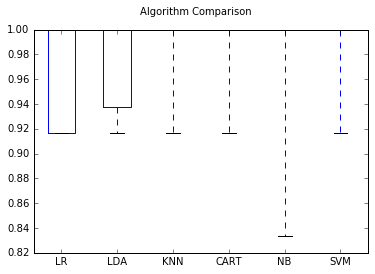

In [8]:
# Box plot of results
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [14]:
# Test model on validation set
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_val)
print 'Accuract Score: %f' % accuracy_score(Y_val, predictions)
print

print 'Confusion Matrix'
print '- - - - - - - - - - - - - - - - - - - - '
print confusion_matrix(Y_val, predictions)
print 

print 'Classification Report'
print '- - - - - - - - - - - - - - - - - - - - '
print classification_report(Y_val, predictions)

Accuract Score: 0.900000

Confusion Matrix
- - - - - - - - - - - - - - - - - - - - 
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]

Classification Report
- - - - - - - - - - - - - - - - - - - - 
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
Iris-virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30

